# Dragon Real Estat-Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN,NaN,NaN,NaN
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,NaN,NaN,NaN
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN,NaN,NaN,NaN
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,NaN,NaN,NaN
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN,NaN,NaN,NaN


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    object 
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(14), int64(3), object(1)
memory usage: 

In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0,0.0,0.0,0.0
mean,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,NaN,NaN,NaN,NaN
std,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,NaN,NaN,NaN,NaN
min,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN,NaN,NaN,NaN
25%,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,NaN,NaN,NaN,NaN
50%,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,NaN,NaN,NaN,NaN
75%,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,NaN,NaN,NaN,NaN
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN,NaN,NaN,NaN


In [7]:
%matplotlib inline

In [8]:
#for plooting histogram
#import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [9]:
#for lerning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)

    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[:test_set_size]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#train_set, test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
    


In [14]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         102 non-null    object 
 1   ZN           102 non-null    float64
 2   INDUS        102 non-null    float64
 3   CHAS         102 non-null    int64  
 4   NOX          102 non-null    float64
 5   RM           102 non-null    float64
 6   AGE          102 non-null    float64
 7   DIS          102 non-null    float64
 8   RAD          102 non-null    int64  
 9   TAX          102 non-null    int64  
 10  PTRATIO      102 non-null    float64
 11  B            102 non-null    float64
 12  LSTAT        102 non-null    float64
 13  MEDV         102 non-null    float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(14), int64(3), object(1)
memory usage

In [15]:
strat_test_set['CHAS'].value_counts()


0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
#95/7

In [18]:
#376/28

In [19]:
housing = strat_train_set.copy()

# looking for correlations

In [20]:
corr_matrix = housing.corr()

C:\Users\vb\AppData\Local\Temp\ipykernel_8384\2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV           1.000000
RM             0.679894
B              0.361761
ZN             0.339741
DIS            0.240451
CHAS           0.205066
AGE           -0.364596
RAD           -0.374693
NOX           -0.422873
TAX           -0.456657
INDUS         -0.473516
PTRATIO       -0.493534
LSTAT         -0.740494
Unnamed: 14         NaN
Unnamed: 15         NaN
Unnamed: 16         NaN
Unnamed: 17         NaN
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

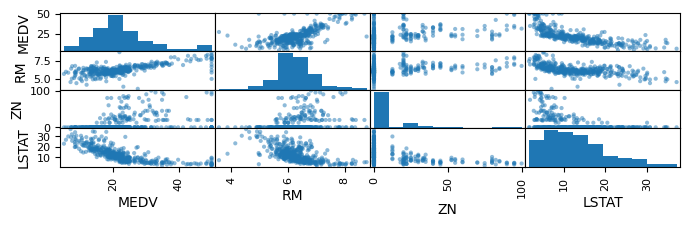

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize = (8,2))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

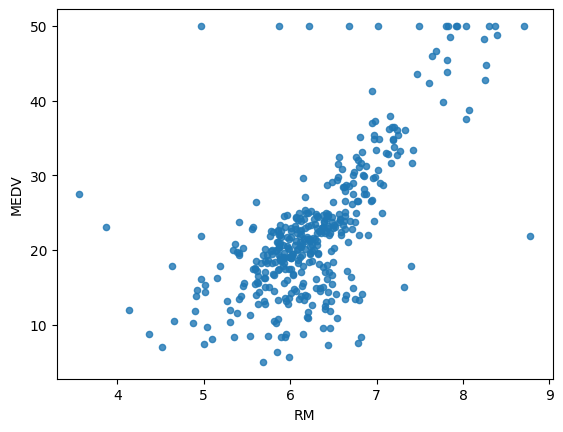

In [23]:
housing.plot(kind='scatter', x="RM", y="MEDV", alpha=0.8)

# attribute combinations

In [24]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [25]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [26]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

C:\Users\vb\AppData\Local\Temp\ipykernel_8384\1962679123.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


MEDV           1.000000
RM             0.679894
B              0.361761
ZN             0.339741
DIS            0.240451
CHAS           0.205066
AGE           -0.364596
RAD           -0.374693
NOX           -0.422873
TAX           -0.456657
INDUS         -0.473516
PTRATIO       -0.493534
TAXRM         -0.525160
LSTAT         -0.740494
Unnamed: 14         NaN
Unnamed: 15         NaN
Unnamed: 16         NaN
Unnamed: 17         NaN
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

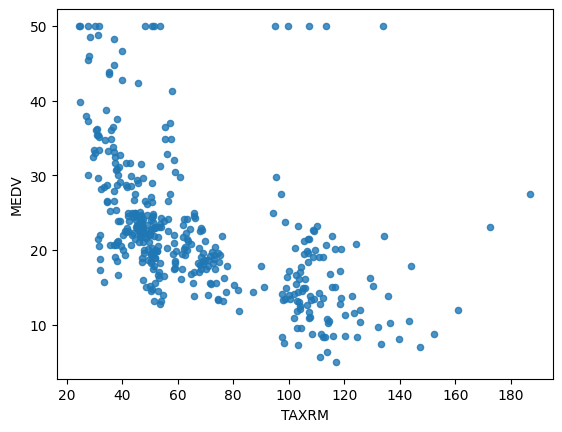

In [27]:
housing.plot(kind='scatter', x="TAXRM", y="MEDV", alpha=0.8)

# missing attributes

In [28]:
#to take care of missing attributes,you have three options
#     1.Get rid of the missing data points
#     2.get rid of the whole attribute
#     3.set the value to some value(0,mean or median) 

In [29]:
a = housing.dropna(subset=["RM"])#option1
a.shape

(404, 19)

In [30]:
housing.drop("RM",axis=1).shape #option2
#note that there is no rm column and also the real housing data frame remain unchanged

(404, 18)

In [31]:
median = housing["RM"].median() #compute median for option3

In [32]:
housing["RM"].fillna(median) #option3 
#note that the originol data frame will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
housing.shape

(404, 19)

In [34]:
housing.isna().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
MEDV             0
Unnamed: 14    404
Unnamed: 15    404
Unnamed: 16    404
Unnamed: 17    404
TAXRM            0
dtype: int64

In [35]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,TAXRM
254,0.04819 80.00 3.640 0 0.3920 6.1080 32...,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,NaN,NaN,NaN,NaN,51.571709
348,0.01501 80.00 2.010 0 0.4350 6.6350 29...,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,NaN,NaN,NaN,NaN,42.200452
476,4.87141 0.00 18.100 0 0.6140 6.4840 93...,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,NaN,NaN,NaN,NaN,102.714374
321,0.18159 0.00 7.380 0 0.4930 6.3760 54...,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,NaN,NaN,NaN,NaN,45.012547
326,0.30347 0.00 7.380 0 0.4930 6.3120 28...,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,NaN,NaN,NaN,NaN,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501 0.00 19.580 1 0.8710 6.1520 82...,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,NaN,NaN,NaN,NaN,65.507152
423,7.05042 0.00 18.100 0 0.6140 6.1030 85...,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,NaN,NaN,NaN,NaN,109.126659
98,0.08187 0.00 2.890 0 0.4450 7.8200 36...,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,NaN,NaN,NaN,NaN,35.294118
455,4.75237 0.00 18.100 0 0.7130 6.5250 86...,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,NaN,NaN,NaN,NaN,102.068966


In [36]:
housing.dropna(inplace=True)

# scikit-learn Design

primarily, three types of object
 1. Estimators -It estimates some parameter based on a dataset. Eg. imputer
 It has a fit method and transform method.
 fit method - Fits the dataset and calculates  internal parameters
 
 2. Transformers - transform methode takes input  and returns output based on the learning from fit().IT has a convenience function called fit_trnsform() which fits and then transform.
 
 3. predictors - Linearregression model is an example of predicter. fit() and predict() are two common function. It also gives score() function. IT also gives score() function which will evaluate the prediction.

# Feature scaling

primarily two types of feature scaling methode:
  1. MIn-Max scaling (normalization)
     (value-min)/(max-min)
     sklearn provides a class called MInMaxscaler for this
     
  2. Standardization
     (value-mean)/std
     sklearn provides a class called Standard for this


# Creating a Pipe line 

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
        ('imputer', SimpleImputer(stratergy="median")),
        #     ......... add as many as you want in your pipe line 
        ('std_scaler', StandardScaler()),
    ])

NameError: name 'SimpleImputer' is not defined

In [ ]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [ ]:
housing_num_tr